In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [7]:

dataset = pd.read_excel("../KPMG_VI_New_raw_data_update_final.xlsx",sheet_name="CustomerDemographic",header=1)

C:\Users\Rojan\AppData\Local\Temp\ipykernel_16232\3778056745.py:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  dataset = pd.read_excel("../KPMG_VI_New_raw_data_update_final.xlsx",sheet_name="CustomerDemographic",header=1)


In [10]:
dataset.head(5)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [12]:
#default column is not required so we remove it
dataset.drop(["default"],axis=1,inplace=True)

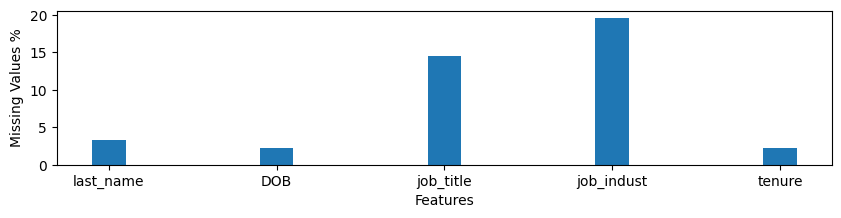

In [20]:
x = []
y= []
fig = plt.figure(figsize = ( 10, 2))

for col in dataset.columns:
    z = dataset[col].isna().sum()
    if z > 0:
        x.append(col[:10])
        y.append(z * 100 / dataset[col].count())

plt.bar(x,y,width=0.2)
plt.xlabel("Features")
plt.ylabel("Missing Values %")

plt.show()

In [23]:
###Exploratory Data Analysis and Data Cleaning

# No changes in customer_id, First Name and Last Name
##Gender

dataset["gender"].value_counts()


Female    2037
Male      1872
U           88
F            1
Femal        1
M            1
Name: gender, dtype: int64

In [28]:
def gen(x):
    if x[0]=="M" or x[0]=="m":
        return 'M'
    elif x[0]=="F" or x[0] =="f":
        return 'F'
    else :
        return "U"
 

In [33]:
## remove the gender that have 'U' 
dataset['gender'] = dataset['gender'].apply(gen)
dataset['gender'].value_counts()

F    2039
M    1873
U      88
Name: gender, dtype: int64

In [34]:
dataset = dataset[dataset['gender']!="U"]

<AxesSubplot:>

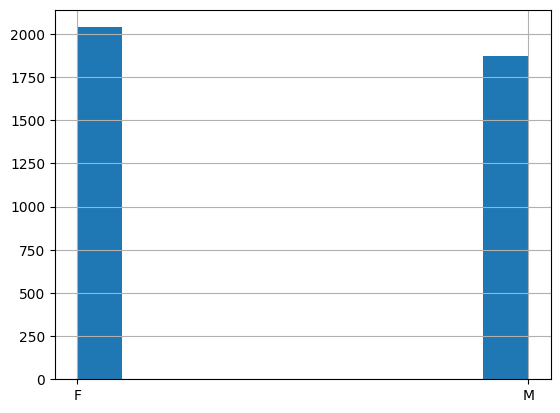

In [41]:
dataset["gender"].hist()

In [43]:
##past_3_years_bike_related_purchases
## no Nan values 
## nothing unusual in the dataset 
dataset["past_3_years_bike_related_purchases"].describe()

count    3912.000000
mean       49.039366
std        28.768226
min         0.000000
25%        24.000000
50%        48.000000
75%        73.000000
max        99.000000
Name: past_3_years_bike_related_purchases, dtype: float64

In [ ]:
##DOB
